# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies

import pandas as pd
import numpy as np
from pathlib import Path
from utils.financial_calculators import *
%matplotlib inline

# Global variables

year_trading_days = 252

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame

# Create the file path for whale_navs.csv
whales_csv_filepath = Path("resources/whale_navs.csv")

# Create the data frame from the CSV file
whales_df = pd.read_csv(
    whales_csv_filepath,
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)

# Displaying the first 5 rows of data
print('Whale DataFrame:\n', whales_df.head(5), '\n')

Whale DataFrame:
             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-01                  31.950240          14.991826   
2014-10-02                  31.936110          14.994072   
2014-10-03                  31.969707          14.999596   
2014-10-06                  32.048215          14.999471   
2014-10-07                  31.964216          14.994720   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  S&P 500  
date                                                                      
2014-10-01                    59.977830               51.948712   194.35  
2014-10-02                    59.978626               51.957619   194.38  
2014-10-03                    60.002264               52.022484   196.52  
2014-10-06                    60.006244               52.036387   196.29  
2014-10-07                    59.993735               52.005864   193.26   



#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.

# NAV = Net Account Value

# calculate the whales daily returns from the whales_df
# =1 is explicitly setting for daily returns
# True is dropping all NaNs
whales_daily_returns = calculate_returns(whales_df, 1, True)

# Displaying the first 5 rows of data
print('Whale Daily Returns:\n\n', whales_daily_returns.head(5), '\n')


Whale Daily Returns:

             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-02                  -0.000442           0.000150   
2014-10-03                   0.001052           0.000368   
2014-10-06                   0.002456          -0.000008   
2014-10-07                  -0.002621          -0.000317   
2014-10-08                   0.000390           0.000369   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  
date                                                                       
2014-10-02                     0.000013                0.000171  0.000154  
2014-10-03                     0.000394                0.001248  0.011009  
2014-10-06                     0.000066                0.000267 -0.001170  
2014-10-07                    -0.000208               -0.000587 -0.015436  
2014-10-08                     0.000242                0.000842  0.017489   



---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

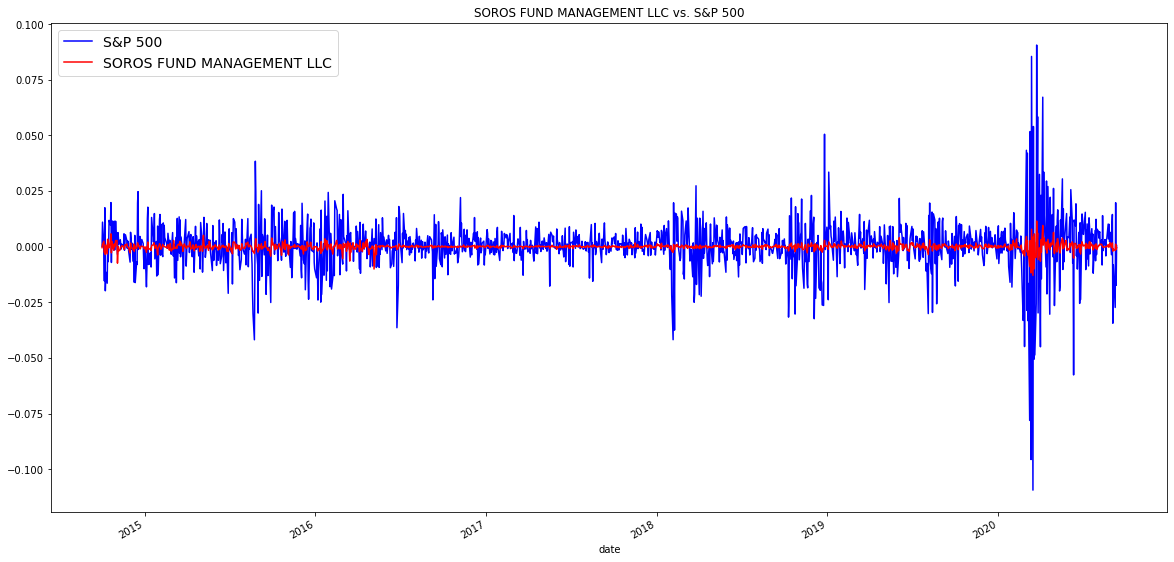

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size

whales_daily_returns['S&P 500'].plot(
    color='blue')
soros_plot = whales_daily_returns['SOROS FUND MANAGEMENT LLC'].plot(
    title='SOROS FUND MANAGEMENT LLC vs. S&P 500',
    figsize=(20,10),
    color='red'
)
soros_plot.legend(
    fontsize=14
)

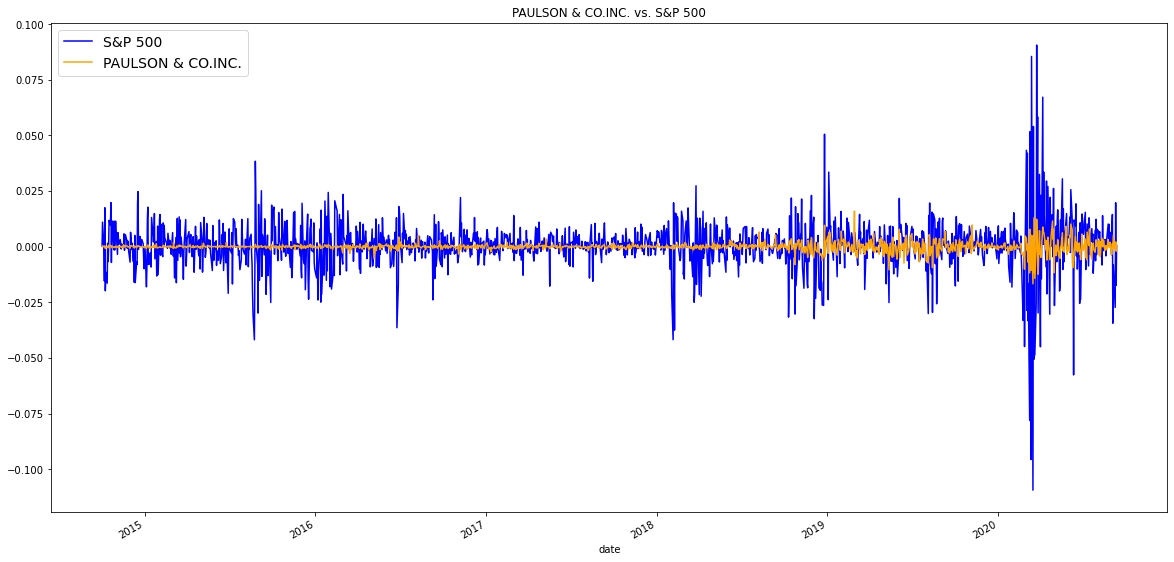

In [5]:
whales_daily_returns['S&P 500'].plot(
    color='blue'
)
paulson_plot = whales_daily_returns['PAULSON & CO.INC.'].plot(
    title='PAULSON & CO.INC. vs. S&P 500',
    figsize=(20,10),
    color='orange'
)
paulson_plot.legend(
    fontsize=14
)

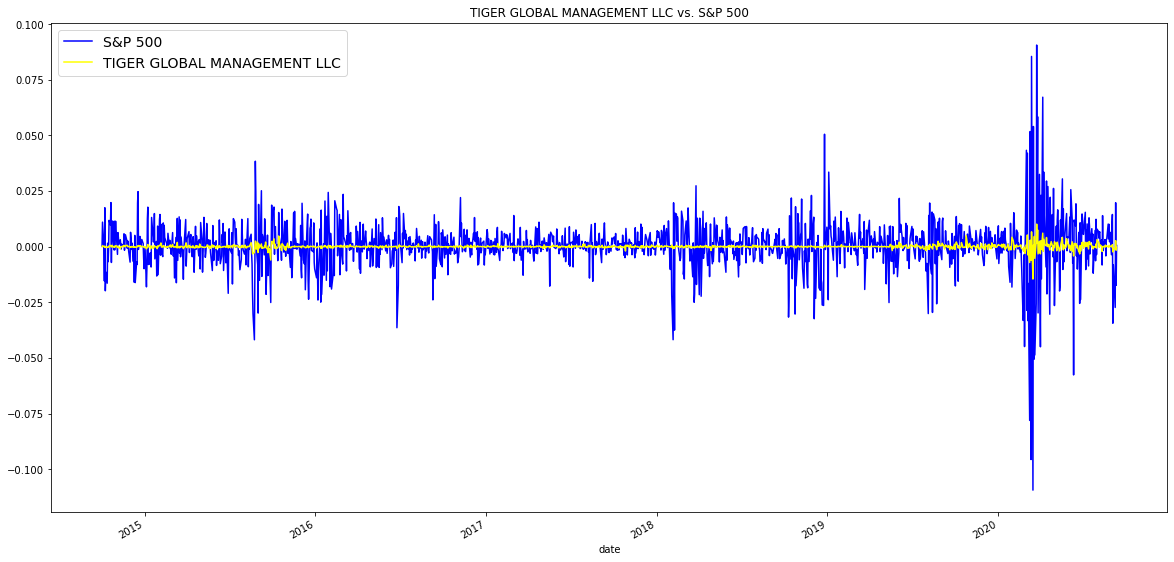

In [6]:
whales_daily_returns['S&P 500'].plot(
    color='blue'
)
tiger_plot = whales_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(
    title='TIGER GLOBAL MANAGEMENT LLC vs. S&P 500',
    figsize=(20,10),
    color='yellow'
)
tiger_plot.legend(
    fontsize=14
)

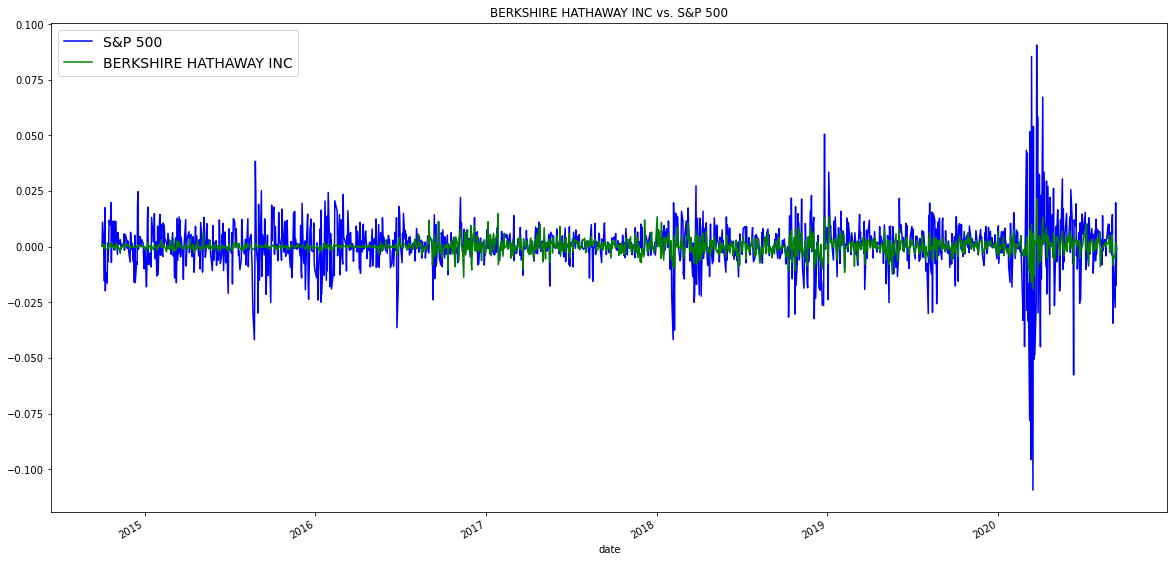

In [7]:
whales_daily_returns['S&P 500'].plot(
    color='blue'
)
berkshire_plot = whales_daily_returns['BERKSHIRE HATHAWAY INC'].plot(
    title='BERKSHIRE HATHAWAY INC vs. S&P 500',
    figsize=(20,10),
    color='green'
)
berkshire_plot.legend(
    fontsize=14
)

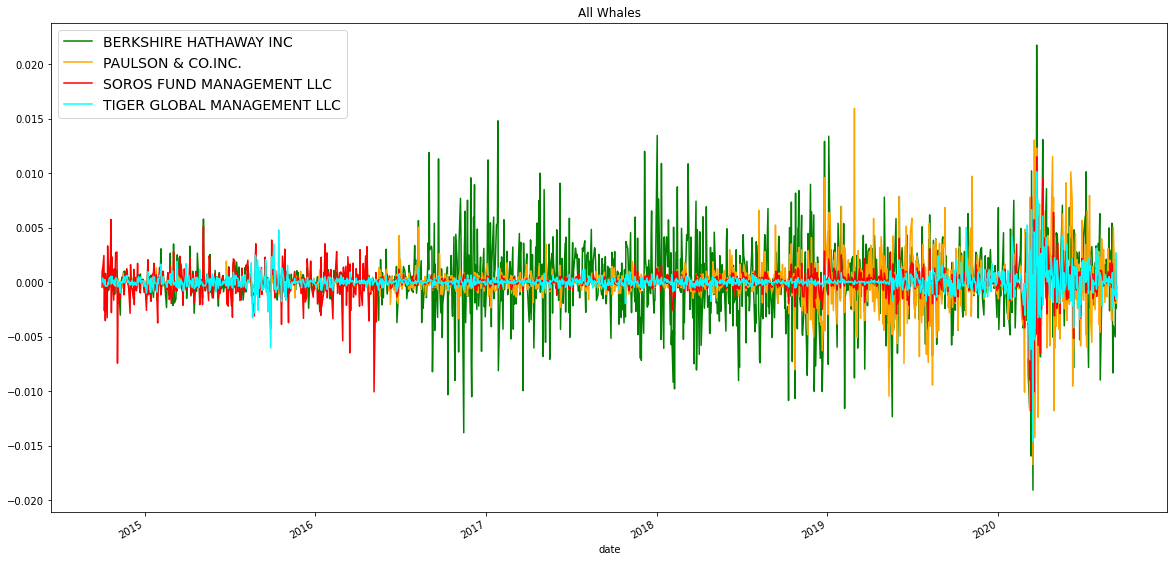

In [8]:
whales_plot = whales_daily_returns['BERKSHIRE HATHAWAY INC'].plot(
    label='BERKSHIRE HATHAWAY INC',
    color='green'
)
whales_daily_returns['PAULSON & CO.INC.'].plot(
    label='PAULSON & CO.INC.',
    color='orange'
)
whales_daily_returns['SOROS FUND MANAGEMENT LLC'].plot(
    title='All Whales',
    label='SOROS FUND MANAGEMENT LLC',
    figsize=(20,10),
    color='red'
)
whales_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(
    label='TIGER GLOBAL MANAGEMENT LLC',
    color='cyan'
)
whales_plot.legend(
    fontsize=14
)

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [9]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500

# Calculate the cumulative returns using the 'cumprod()' function
whales_cumulative_returns = (1 + whales_daily_returns).cumprod()

# whales_cumulative_returns = calculate_cumulative_returns(whales_daily_returns)

# Review the last 5 rows of the cumulative returns DataFrame
whales_cumulative_returns.tail(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

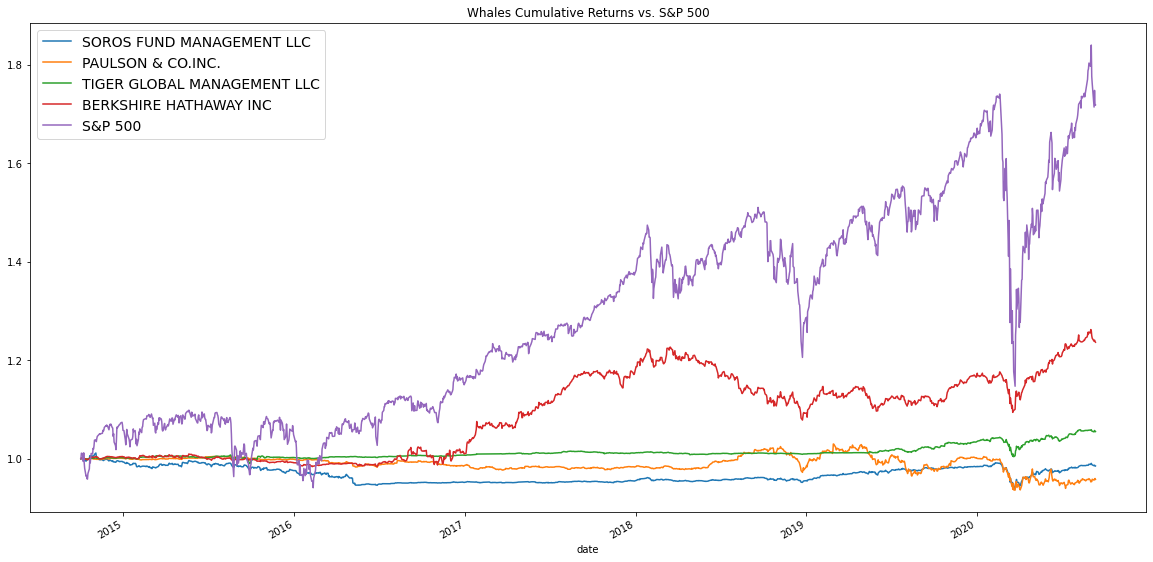

In [10]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size

whales_cumulative_plot = whales_cumulative_returns.plot(
    title='Whales Cumulative Returns vs. S&P 500',
    figsize=(20,10)
)
whales_cumulative_plot.legend(
    fontsize=14
)


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** 
- *No, over time none of the funds outperform the S&P 500.*

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Box Plot of Daily Returns for Whales vs. S&P 500'}>

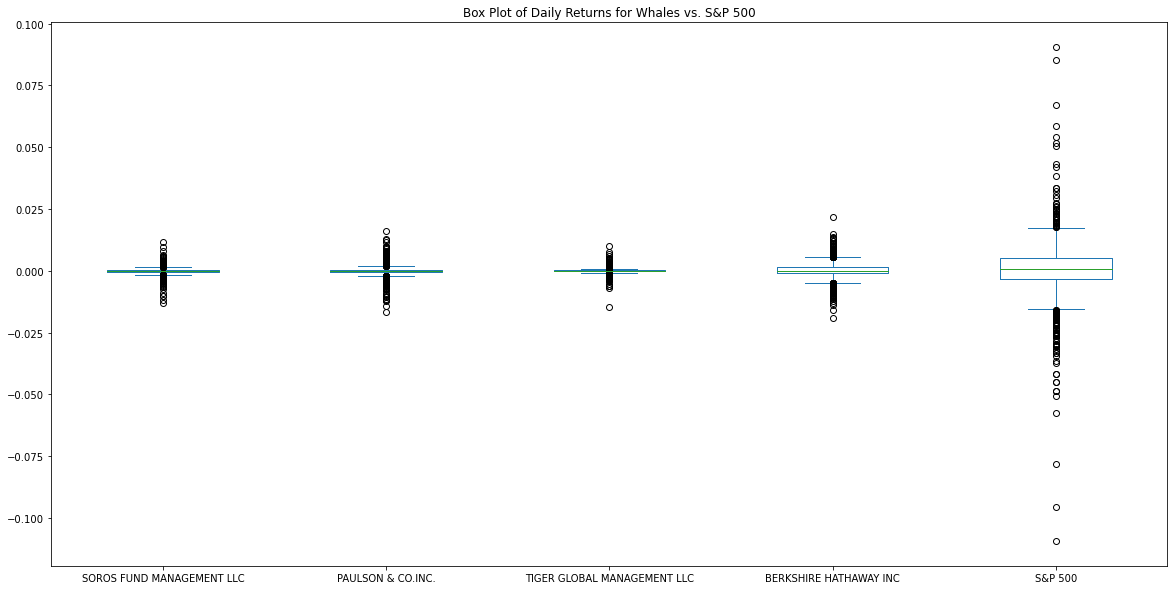

In [11]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
whales_daily_returns.plot.box(
    title='Box Plot of Daily Returns for Whales vs. S&P 500',
    figsize=(20,10)
)

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Box Plot of Daily Returns for Whales only'}>

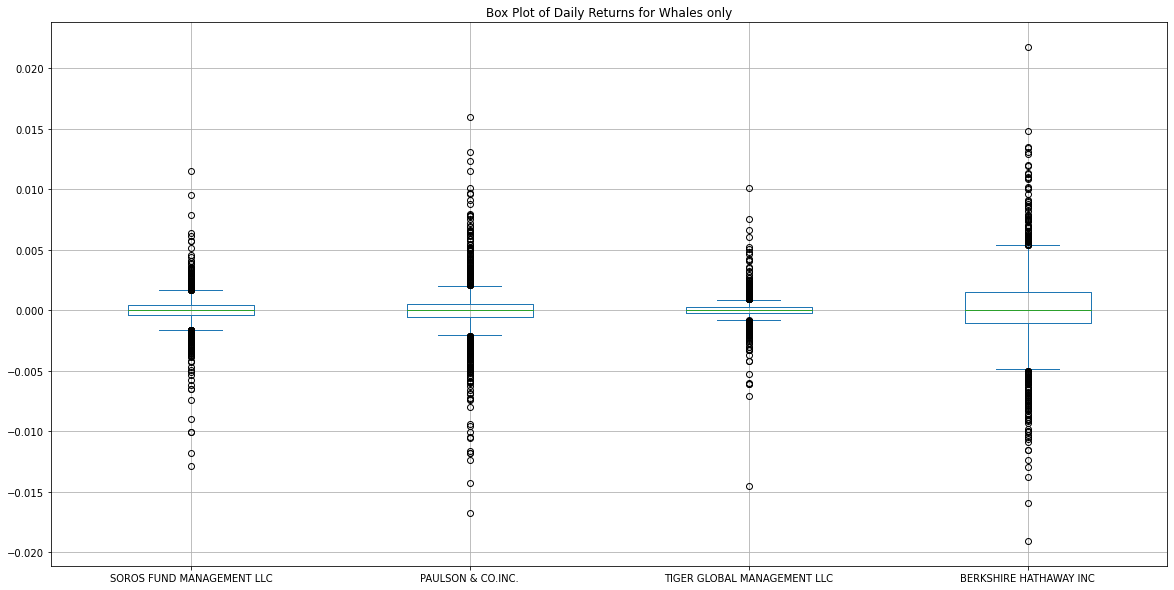

In [12]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
whales_only_daily_returns = whales_daily_returns.copy().drop(columns='S&P 500')

# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
whales_only_daily_returns.plot.box(
    title='Box Plot of Daily Returns for Whales only',
    grid=True,
    figsize=(20,10)
)

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** 
- *Berkshire Hathaway was the most volatile with the largest spread.*
- *Tiger Global Management was the least volatile overall, though it had one negative outlier farther away than Soros Fund Management.*

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [13]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
whales_std_dev = whales_daily_returns.std()

# Review the standard deviations sorted smallest to largest
print(f"Whales Standard Deviations, Sorted\n\n{whales_std_dev.sort_values()}\n")


Whales Standard Deviations, Sorted

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64



#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [14]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
whales_annualized_std_dev = whales_daily_returns.std() * np.sqrt(year_trading_days)

# Review the annual standard deviations smallest to largest
print(f"Whales Annualized Standard Deviations, Sorted\n\n{whales_annualized_std_dev.sort_values()}\n")

Whales Annualized Standard Deviations, Sorted

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64



#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

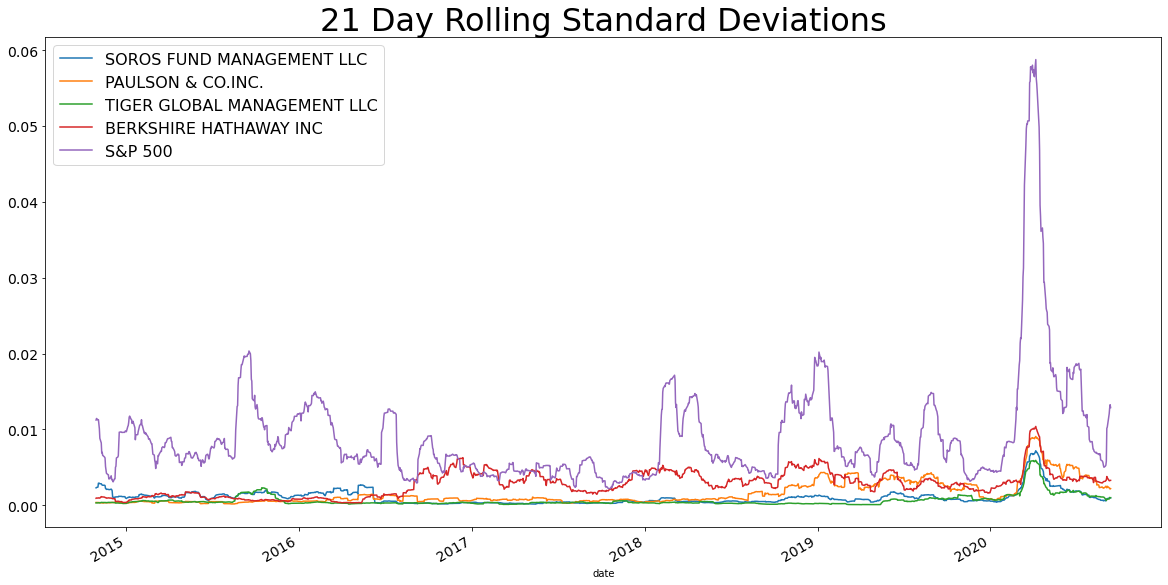

In [15]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500

# Include a title parameter and adjust the figure size
rolling_plot = whales_daily_returns.rolling(window=21).std().plot(
    title="21 Day Rolling Standard Deviations",
    fontsize=14,
    figsize=(20,10)
)
rolling_plot.title.set_fontsize(32)
rolling_plot.legend(
    fontsize=16
)

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

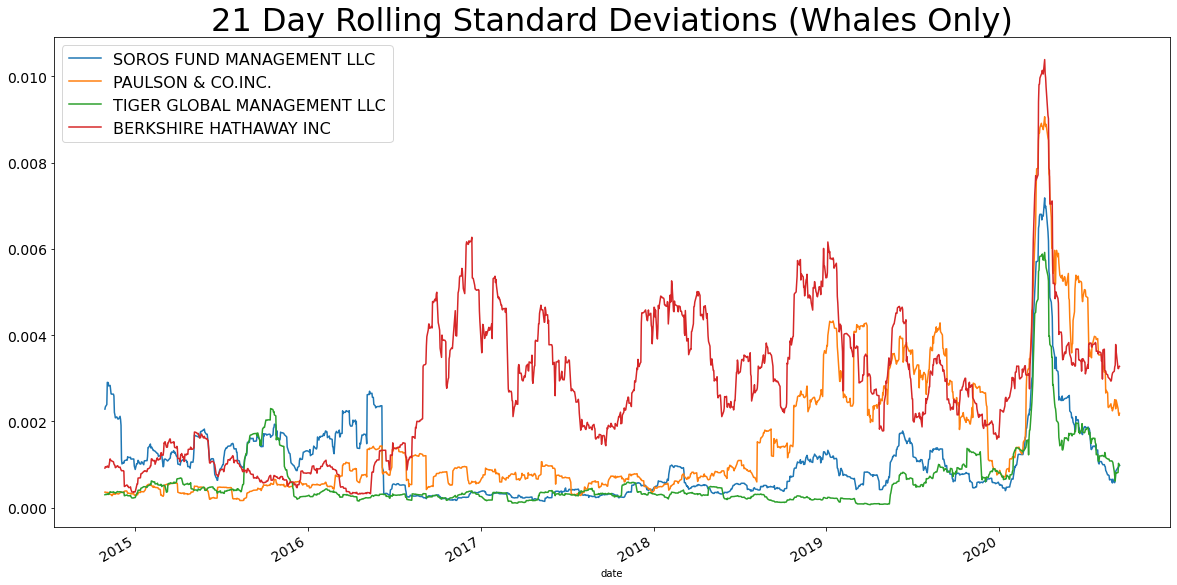

In [16]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size

whales_only_rolling_plot = whales_only_daily_returns.rolling(window=21).std().plot(
    title="21 Day Rolling Standard Deviations (Whales Only)",
    fontsize=14,
    figsize=(20,10)
)

whales_only_rolling_plot.title.set_fontsize(32)
whales_only_rolling_plot.legend(fontsize=16)

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** 
- *Based on he annualized standard deviation, none of the portfolios pose more risk than the S&P 500.*
- *That said, out of the four portfolios, Paulson & Co and Berkshire Hathaway are the riskiest of the bunch.*

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** 
- *There's a strong correlation of risk between all portfolios and the S&P 500 during the market drop March~April 2020.*
- *There also appears to be some small risk correlation between some of the portfolios and S&P 500 at the end of 2018, and during 2019.*
- *Overall, however, these portfolios present little correlation of risk with the S&P 500.*

**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # 
- *Berkshire Hathaway is the riskiest portfolio.*
- *Bershire's risk profile changes significantly in the last half of 2016 and continues to remain elevated compared to the other portfolios, though Paulson & Co starts to match Berkshire's risk profile at the end of 2018 and through 2019.*

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [17]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
whales_annual_average_return = whales_daily_returns.mean() * year_trading_days

# Review the annual average returns sorted from lowest to highest
print(f"Whales Annualized Average Return, Sorted\n\n{whales_annual_average_return.sort_values()}\n")

Whales Annualized Average Return, Sorted

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64



#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [18]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
whales_sharpe_ratios = whales_annual_average_return / whales_annualized_std_dev

# Review the Sharpe ratios sorted lowest to highest
print(f"Whales Sharpe Ratios, Sorted\n\n{whales_sharpe_ratios.sort_values()}\n")


Whales Sharpe Ratios, Sorted

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64



#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

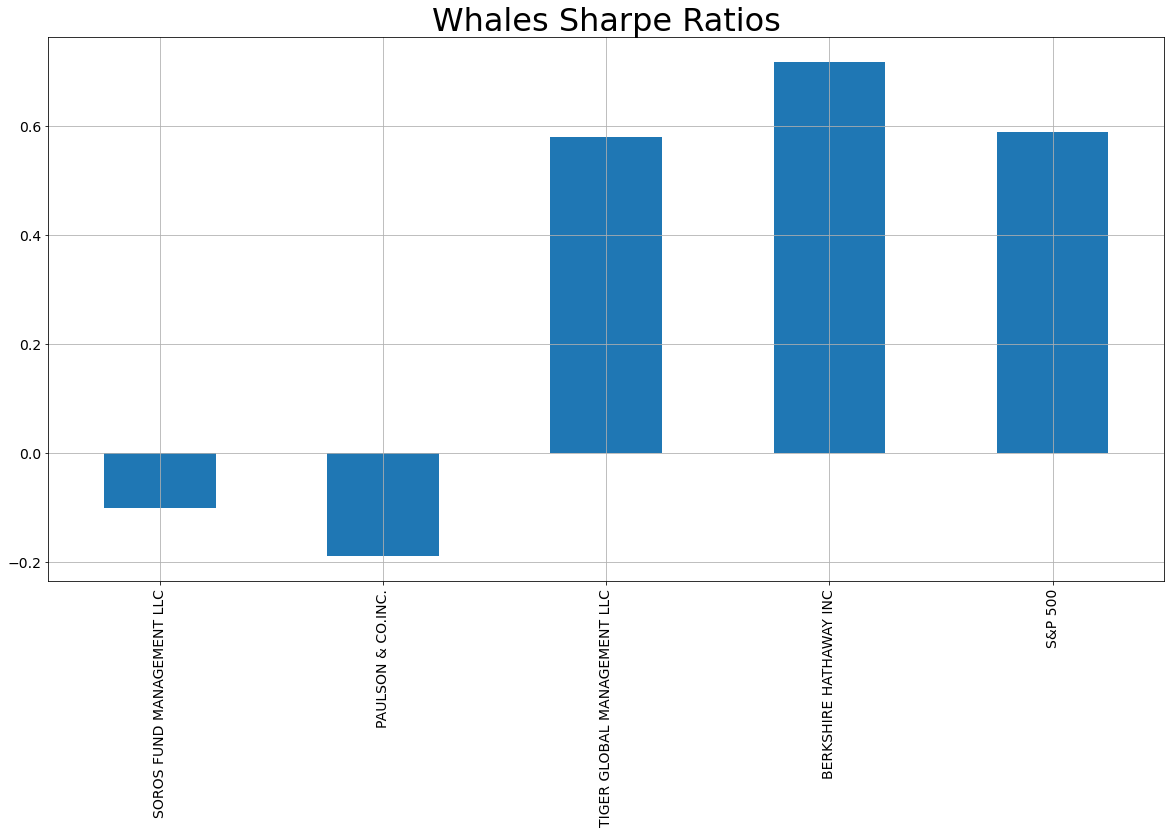

In [19]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
whales_bar_plot = whales_sharpe_ratios.plot(
    kind='bar',
    title='Whales Sharpe Ratios',
    grid=True,
    fontsize=14,
    figsize=(20,10)
)
whales_bar_plot.title.set_fontsize(32)


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** 
- *Berkshire Hathaway has the **best** risk-return profile.*
- *Paulson & Co. has the **worst** risk-return profile.*

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [20]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_rolling_60_variance = whales_daily_returns['S&P 500'].rolling(window=60).var()

print(f"S&P 500 60-day Rolling Variance\n\n{sp500_rolling_60_variance.tail(5)}\n")

S&P 500 60-day Rolling Variance

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64



#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [21]:
# Calculate the covariance using a 60-day rolling window

berkshire_rolling_60_covariance = whales_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(whales_daily_returns['S&P 500'])

# Review the last five rows of the covariance data
print(f"Berkshire 60-day Rolling Covariance\n\n{berkshire_rolling_60_covariance.tail(5)}\n")


Berkshire 60-day Rolling Covariance

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64



##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [22]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)

berkshire_rolling_60_beta = berkshire_rolling_60_covariance / sp500_rolling_60_variance

# Review the last five rows of the beta information
print(f"Berkshire 60-day Rolling Beta\n\n{berkshire_rolling_60_beta.tail(5)}\n")


Berkshire 60-day Rolling Beta

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64



##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [23]:
# Calculate the average of the 60-day rolling beta

# A simple rolling average (moving average) is the unweighted mean of the last n values.
berkshire_rolling_60_average_beta = berkshire_rolling_60_beta.rolling(window=60).mean()

print(f"Berkshire 60-day Rolling Average Beta\n\n{berkshire_rolling_60_average_beta.tail(5)}\n")

Berkshire 60-day Rolling Average Beta

date
2020-09-04    0.164022
2020-09-08    0.164963
2020-09-09    0.165795
2020-09-10    0.166471
2020-09-11    0.167102
dtype: float64



##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

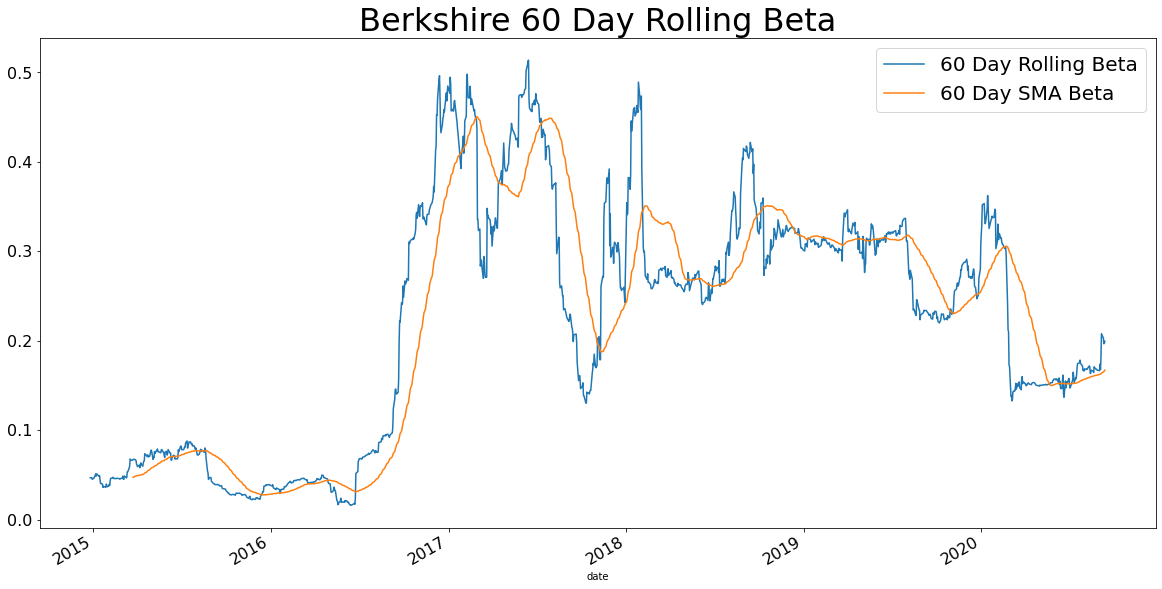

In [24]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

berkshire_rolling_plot = berkshire_rolling_60_beta.plot(
    title="Berkshire 60 Day Rolling Beta",
    fontsize=16,
    figsize=(20,10)
)
berkshire_rolling_60_average_beta.plot(ax=berkshire_rolling_plot)

berkshire_rolling_plot.title.set_fontsize(32)
berkshire_rolling_plot.legend(
    ['60 Day Rolling Beta', '60 Day SMA Beta'],
    fontsize=20
)

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [25]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data

tigerglobal_rolling_60_covariance = whales_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(whales_daily_returns['S&P 500'])

# Review the last five rows of the covariance data
print(f"Tiger Global 60-day Rolling Covariance\n\n{tigerglobal_rolling_60_covariance.tail(5)}\n")


Tiger Global 60-day Rolling Covariance

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64



##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [26]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information

tigerglobal_rolling_60_beta = tigerglobal_rolling_60_covariance / sp500_rolling_60_variance

# Review the last five rows of the beta information
print(f"Tiger Global 60-day Rolling Beta\n\n{tigerglobal_rolling_60_beta.tail(5)}\n")


Tiger Global 60-day Rolling Beta

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64



##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [27]:
# Calculate the average of the 60-day rolling beta

# A simple rolling average (moving average) is the unweighted mean of the last n values.
tigerglobal_rolling_60_average_beta = tigerglobal_rolling_60_beta.rolling(window=60).mean()

print(f"Tiger Global 60-day Rolling Average Beta\n\n{tigerglobal_rolling_60_average_beta.tail(5)}\n")

Tiger Global 60-day Rolling Average Beta

date
2020-09-04    0.070646
2020-09-08    0.070545
2020-09-09    0.070489
2020-09-10    0.070493
2020-09-11    0.070450
dtype: float64



##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

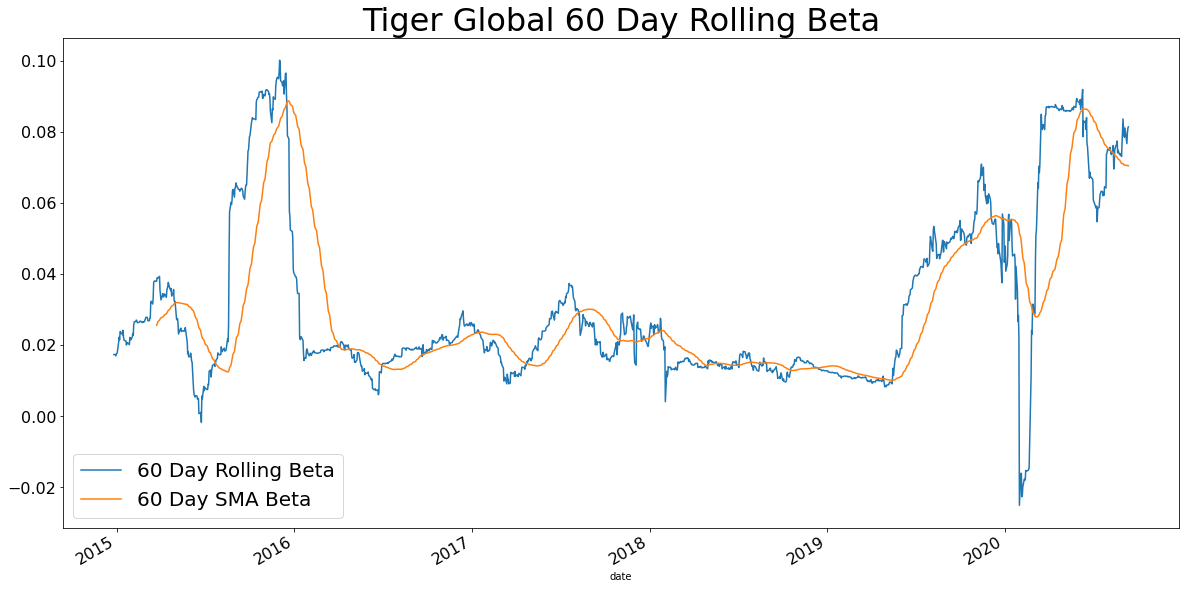

In [28]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

tigerglobal_rolling_plot = tigerglobal_rolling_60_beta.plot(
    title="Tiger Global 60 Day Rolling Beta",
    fontsize=16,
    figsize=(20,10)
)
tigerglobal_rolling_60_average_beta.plot(ax=tigerglobal_rolling_plot)

tigerglobal_rolling_plot.title.set_fontsize(32)
tigerglobal_rolling_plot.legend(
    ['60 Day Rolling Beta', '60 Day SMA Beta'],
    fontsize=20
)

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** 
- *Berkshire Hathaway is more sensitive to movements in the S&P 500.*


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** 
- *I recommend Tiger Global Management's fund in our suite of offerings.*

---